Analysis of Student Performance Data

Background Information:

We have chosen to analyze data collected on students from two secondary schools in Portugal. Information was recorded by survey and school reports on both the educational careers and the personal lives of the students. In total, 33 variables were recorded for the dataset. The data includes details on grades, work and health habits, as well as family background and details on time spent outside of school. For example, information such as parental work status; time spent travelling, studying, leisure; and other personal information like age, sex and school attended. 

Question being answered in this project:

Our goal is to determine if a student’s final grade (denoted as G3 in the data set) can be accurately predicted based on a set of chosen variables (first and second period grades, denoted as G1 and G2). Namely, we will attempt to answer the question: What final grade will a student receive according to their previous grades?

First, we added the required libraries before beginning our analysis.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(cowplot)
library(shiny)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Reading the file:

The dataset is available as a zip file on the web. Thus, we have downloaded it as a zip file and used the unzip function to obtain the individual files. The file we are interested in is student-por.csv. We have read this file using read_delim function rather than using read_csv because the observations for different variables are separated by a semicolon rather than comma(the usual format for .csv files). Next, we count the number of rows in the entire data frame, before and after, filtering for missing values. We can see that the number of rows(649) did not change, therefore we can conclude that there are no missing observations. We then display the first 6 rows of the data, which, as we can see, contains 33 variables. 

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
download.file(url, "student.zip")
unzip("student.zip")
student_data <- read_delim("student-por.csv", delim=";") 
paste0(nrow(student_data), ": Number of rows in the data set")
paste0(nrow(filter(student_data, na.rm = TRUE)), ": Number of rows after filtering the data for missing observations")
tags$h2("Table 1")
head(student_data)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.



[1] "649: Number of rows in the data set"

[1] "649: Number of rows after filtering the data for missing observations"

Shiny tags cannot be represented in plain text (need html)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


Choosing predictors:

Choosing every variable is not a good option when making a prediction. Therefore, we have used the cor() function to get the correlation coefficients for all numeric variables with respect to G3(our predicted variable). We see that G1 and G2 have the highest correlation with G3 and thus use the ggpairs function to better understand the correlation.

Shiny tags cannot be represented in plain text (need html)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G3,-0.1065054,0.2401508,0.2117997,-0.127173,0.2497887,-0.3933155,0.06336113,-0.1227049,-0.08764072,-0.2047194,-0.1766189,-0.09885124,-0.09137906,0.8263871,0.918548,1


Shiny tags cannot be represented in plain text (need html)

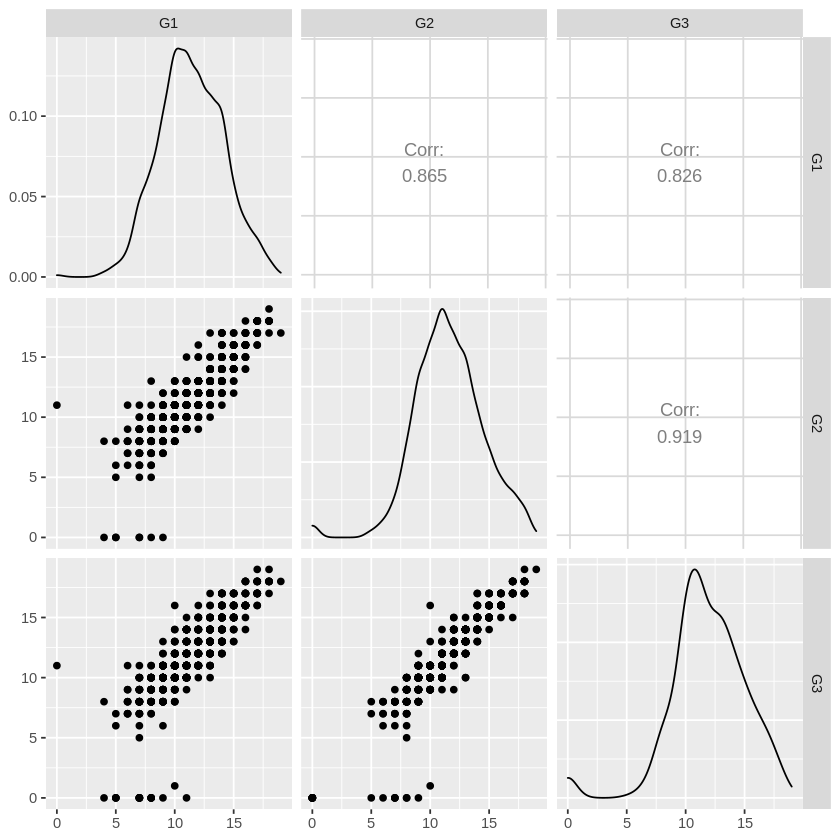

In [3]:
tags$h2("Table 2")
student_numeric <- select(student_data, where(is.numeric)) #finding correlation coefficients
cor(student_numeric) %>% as.data.frame() %>% slice(16)

tags$h2("Figure 1")
student_select <- select(student_data, G1, G2, G3)
predictor_visualization <- ggpairs(student_select)
predictor_visualization
# High correlation

About the predictors:

The variables we will be using as predictors are G1 and G2 which are the grades for the first and second periods respectively, with values ranging from 0 to 20. We chose these variables as we believe they most concisely offer a representation of a student’s success in the classroom as well as they were good predictors due to their high correlation with G3. These variables could also be found with minimal effort, as previous grades would be recorded, therefore not requiring any additional effort to collect.

Summary Statistics - Answering Exploratory Questions

We set our seed so that our results are reproducible and then we divided our data into training and testing portions with a 75/25 split to allow for the tuning and evaluation of our model. We then calculated the mean and median for all 3 variables in the training data and aggregated them into a tidy table, as this would give us an idea of how differently the variables are distributed. <br>
In the training data set, we observe:<br>
•	There are 488 observations<br>
•	There are no missing observations (as previously determined) and the data set is in a tidy format<br> 
•	The means and medians slightly increase across grading periods

In [4]:
set.seed(1234)
student_split <- initial_split(student_select, prop = 0.75, strata = G3)
student_training <- training(student_split) 
student_testing <- testing(student_split)
tags$h2("Table 3")
head(student_training)

Shiny tags cannot be represented in plain text (need html)

G1,G2,G3
<dbl>,<dbl>,<dbl>
0,11,11
9,11,11
12,13,12
14,14,14
11,13,13
12,12,13


In [5]:
student_statistics <- student_training %>%
summarize("Number of Rows" = nrow(student_training),
         "Mean of G1" = mean(G1),
         "Mean of G2" = mean(G2),
         "Mean of G3" = mean(G3),
         "Median of G1" = median(G1),
         "Median of G2" = median(G2),
         "Median of G3" = median(G3))

statistics_summary <- tibble("Grading Period" = c("G1","G2","G3"), #aggregated statistics into a single tidy table
                       "Mean" = c(11.37295, 11.58607, 11.89754),
                       "Median" = c(11, 11, 12),
                       "Number of Rows" = c(488))
tags$h2("Table 4")
statistics_summary

Shiny tags cannot be represented in plain text (need html)

Grading Period,Mean,Median,Number of Rows
<chr>,<dbl>,<dbl>,<dbl>
G1,11.37295,11,488
G2,11.58607,11,488
G3,11.89754,12,488


We made histograms to visualize the distribution for each grading period (G1, G2 and G3). These will be helpful as they are a concise visualization of the variables in the training data set. 

Shiny tags cannot be represented in plain text (need html)

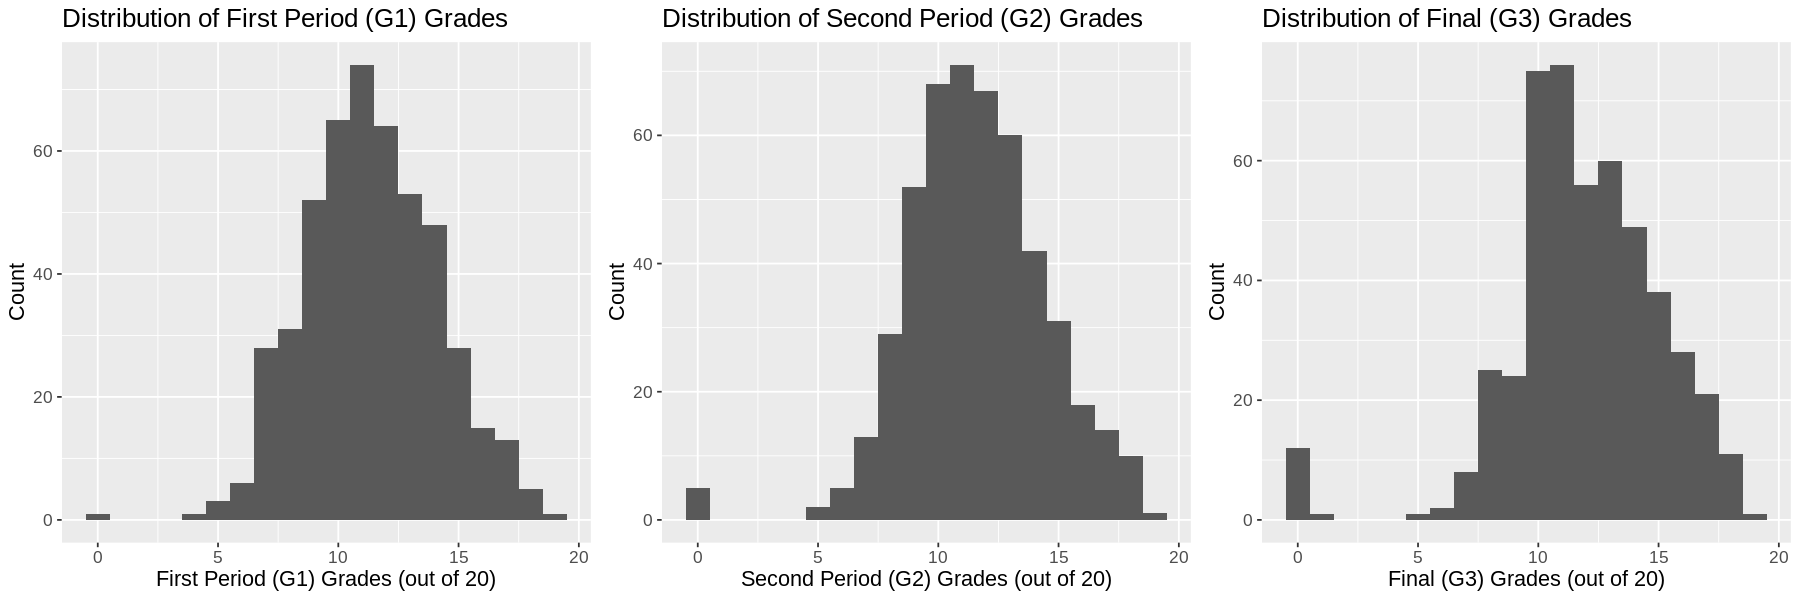

In [6]:
options(repr.plot.width = 15, repr.plot.height = 5)
g1_distribution <- ggplot(student_training, aes(x = G1))+
geom_histogram(bins = 20)+
labs(x = "First Period (G1) Grades (out of 20)", y = "Count")+
theme(text = element_text(size = 13))+
ggtitle("Distribution of First Period (G1) Grades")
g2_distribution <- ggplot(student_training, aes(x = G2))+
geom_histogram(bins = 20)+
labs(x = "Second Period (G2) Grades (out of 20)", y = "Count")+
theme(text = element_text(size = 13))+
ggtitle("Distribution of Second Period (G2) Grades")
g3_distribution <- ggplot(student_training, aes(x = G3))+
geom_histogram(bins = 20)+
labs(x = "Final (G3) Grades (out of 20)", y = "Count")+
ggtitle("Distribution of Final (G3) Grades")+
theme(text = element_text(size = 13))
predictor_distribution <- plot_grid(g1_distribution,
                                    g2_distribution,
                                    g3_distribution,
                                    ncol = 3)
tags$h2("Figure 2")
predictor_distribution

As we can see from the histograms, the distributions show no severe skews, but do have some outliers at 0. 

Planning the analysis:

We will conduct our analysis using a multivariable k-nearest neighbors regression model as it requires few assumptions as to what our data must look like and is unaffected by collinearity. We will also use 10-fold cross-validation to choose the number of neighbors to minimize the RMSE of our model and to limit the effects of random chance. We will visualize the results of our k-nearest neighbors regression model by creating a plot that visualizes the relationship between G3 with G1 and G2 along with a regression line. We expect to find that there is a strong positive relationship between final grades with G1 and G2. We also expect the predicted final grades to be relatively close to the actual final grades due to the high correlation between the variables. 

Analysis:

To begin, we create a tuning model to determine the best k-value for our data and make a recipe that predicts G3 based on G1 and G2, and scales and centers all predictors. Next, we created our object to perform 10-fold cross-validation with our predicted variables as the strata; and made our workflow with our basic recipe and model. 
We then tested k-values from 1-200 with cross-validation and collected the metrics for the k-values. By filtering for the lowest RMSE, we determined that a k-value of 8 would minimize our error (the lowest being 1.40). Using this k-value of 8 we built our new, best model and made a fit to be evaluated with the testing data. 
Finally, we ran the testing data through the fit and collected the metrics to determine our RMPSE on the testing data. 

In [7]:
student_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) %>%
set_engine("kknn") %>%
set_mode("regression")
tags$h2("KNN Model 1")
student_spec

Shiny tags cannot be represented in plain text (need html)

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [8]:
student_recipe <- recipe(G3 ~ G1 + G2, data = student_training) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())
tags$h2("KNN Recipe 1")
student_recipe

Shiny tags cannot be represented in plain text (need html)

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [9]:
student_vfold <- vfold_cv(student_training, v = 10, strata = G3)
student_workflow <- workflow() %>%
add_recipe(student_recipe) %>%
add_model(student_spec)
tags$h2("KNN Workflow 1")
student_workflow

Shiny tags cannot be represented in plain text (need html)

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [10]:
gridvals <- tibble(neighbors = seq(from = 1, to = 200)) 
student_results <- student_workflow %>%
tune_grid(resamples = student_vfold, grid = gridvals) %>%
collect_metrics()
tags$h2("Table 5")
head(student_results)

Shiny tags cannot be represented in plain text (need html)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,1.7567797,10,0.15862691,Model001
1,rsq,standard,0.7221983,10,0.03950129,Model001
2,rmse,standard,1.5826320,10,0.17761345,Model002
2,rsq,standard,0.7579105,10,0.04408261,Model002
3,rmse,standard,1.5638047,10,0.13729703,Model003
3,rsq,standard,0.7627604,10,0.03389215,Model003


In [11]:
student_min <- student_results %>%
filter(.metric == 'rmse') %>%
arrange(mean) %>%
slice(1)
tags$h2("Table 6")
student_min

Shiny tags cannot be represented in plain text (need html)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8,rmse,standard,1.407227,10,0.1243025,Model008


In [12]:
k_min <- student_min %>%
pull(neighbors)
paste0(k_min, ": Number of neighbors that correspond to lowest RMSE")

[1] "8: Number of neighbors that correspond to lowest RMSE"

In [13]:
student_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
set_engine("kknn") %>%
set_mode("regression")
tags$h2("KNN Model 2")
student_best_spec

Shiny tags cannot be represented in plain text (need html)

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = k_min
  weight_func = rectangular

Computational engine: kknn 


In [14]:
student_best_fit <- workflow() %>%
add_recipe(student_recipe) %>%
add_model(student_best_spec) %>%
fit(data = student_training)
tags$h2("KNN Workflow 2")
student_best_fit

Shiny tags cannot be represented in plain text (need html)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~k_min,     kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 0.8706455
Minimal mean squared error: 1.878298
Best kernel: rectangular
Best k: 8

In [15]:
student_summary <- predict(student_best_fit, student_testing) %>%
bind_cols(student_testing) %>%
metrics(truth = G3, estimate = .pred) %>%
filter(.metric == "rmse")
tags$h2("Table 7")
student_summary

Shiny tags cannot be represented in plain text (need html)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.043363


In [16]:
paste0(student_min %>% pull(mean), ": RMSE (for training data)")
paste0(student_summary %>% pull(.estimate), ": RMSPE (for testing data)")

[1] "1.40722689307898: RMSE (for training data)"

[1] "1.04336300799848: RMSPE (for testing data)"

Analyzing the effectiveness of our model:

Firstly, through the building and tuning of our model, we found that the number of neighbors which minimized our mean-squared error was 8. Building and evaluating a model with this parameter and evaluating it using our testing data netted a RMSPE of 1.04 compared to that of 1.41 from the training data, which indicates that it actually did better on our testing data than the training data. This value of 1.04 corresponds to the predicted error of the model when testing on new data, on the scale of the score (out of 20) for the final grade. This more or less aligned with what we had originally expected, as a predicted error of 1 (on a scale of 20) is fairly reliable.

Visualizing our model:

In order to visualize our model, we have created two separate plots with their own regression line. We did so because our model uses two predictors, and we are unable to plot in 3 dimensions. The first plot shows the relationship between G3 and G1 and the second plot shows the relationship between G3 and G2. We have predicted the final grades on the testing data set using the model created earlier that produces the lowest rmspe. This allows us to create the regression line that represents the relationship between the predicted final grades, and the predictor corresponding to its plot. We use the geom_smooth function to plot the regression line and we see that it is almost a straight line and has slope nearly equal to 1. We also see that most points are relatively close to the prediction area, although there are some outliers when G3 is 0 but the grades for G1 and G2 are greater than 0. Thus, the two plots help us in understanding the effectiveness of our model. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



Shiny tags cannot be represented in plain text (need html)

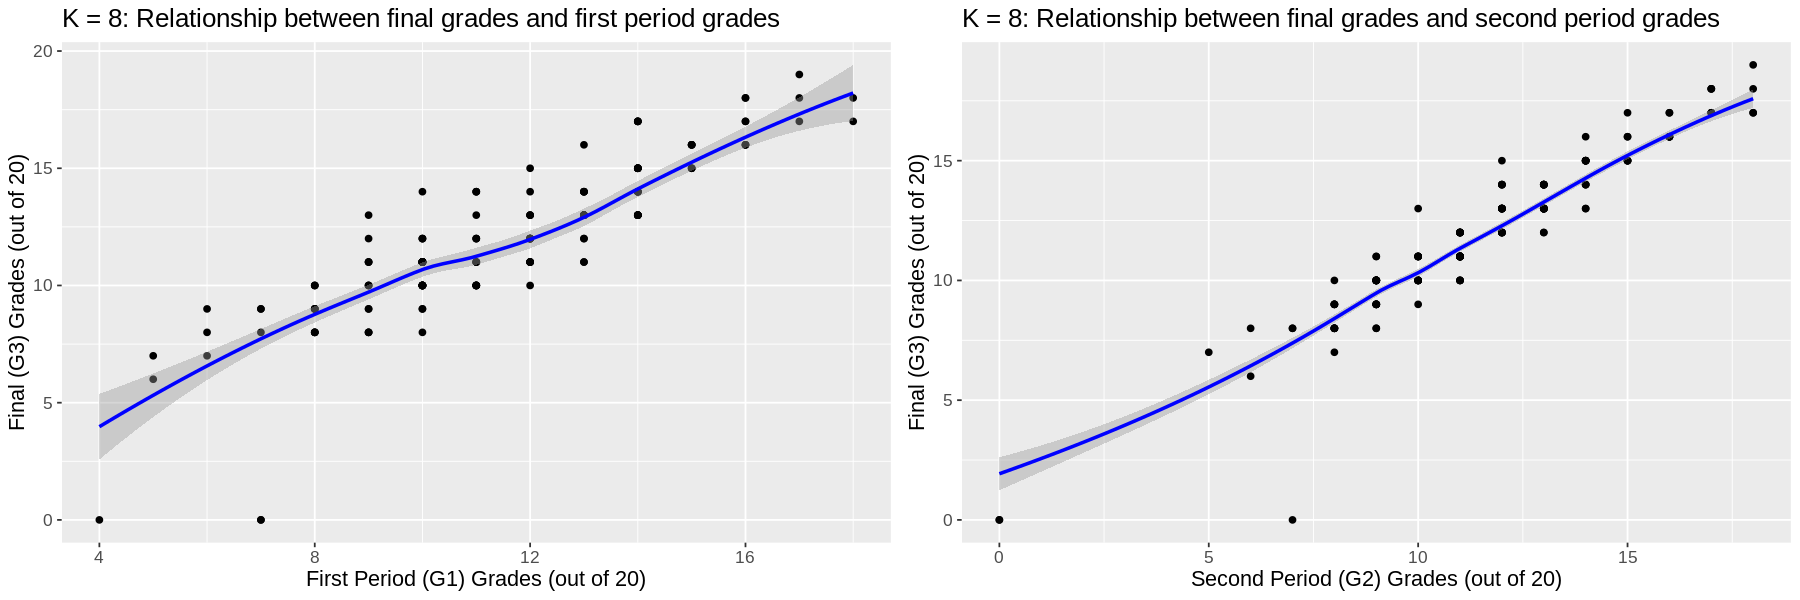

In [17]:
options(repr.plot.width = 15, rer.plot.height = 7)
student_preds <- predict(student_best_fit, student_testing) %>%
bind_cols(student_testing)
student_plot_g1 <- student_testing %>%
ggplot(aes(x = G1, y = G3)) +
geom_point() +
geom_smooth(data = student_preds,
         mapping = aes(x = G1, y = .pred),
         color = "blue") +
ggtitle(paste0("K = ", k_min, ": Relationship between final grades and first period grades")) +
labs(x = "First Period (G1) Grades (out of 20)", y = "Final (G3) Grades (out of 20)") +
theme(text = element_text(size = 13))

student_plot_g2 <- student_testing %>%
ggplot(aes(x = G2, y = G3)) +
geom_point() +
geom_smooth(data = student_preds,
         mapping = aes(x = G2, y = .pred),
         color = "blue") +
ggtitle(paste0("K = ", k_min, ": Relationship between final grades and second period grades")) +
labs(x = "Second Period (G2) Grades (out of 20)", y = "Final (G3) Grades (out of 20)") +
theme(text = element_text(size = 13))

model_visualization <- plot_grid(student_plot_g1,
                                student_plot_g2,
                                ncol = 2)
tags$h2("Figure 3")
model_visualization

Conclusion:

These findings could be used to help students who might be struggling, especially those who are predicted to have lower/failing final grades. It could also help the school to predict a student's final grades based on their previous performance, over time this could help the school find trends in performance which might allow it to improve upon itself and offer specialized help to students in need, or even fast-track the progress of those who are excelling. The predictions could even be shown to the students or their parents in order to encourage them to work harder or show how much their current work could pay off. 

All this could lead to further analysis on the prediction of final grades, perhaps using variables other than first and second period grades and could be used to predict grades throughout the year, rather than just the final. It could also lead to questions on how other variables could be predicted, such as a student’s number of failures or amount of free time, as this might also help indicate if a student needs additional help for their schooling. Or, additionally, how much support the student is receiving in and outside of school. In both these situations, the ultimate goal would be to offer a stronger support system around students, and to find and help those who need it before it otherwise would have been noticed. 

Legend:

Table 1 - Our raw, unfiltered data set, containing all 32 predictor variables and 1 predicted variable.<br>
Table 2 - A table of correlation values between each numeric predictor and our predicted variable.<br>
Table 3 - Our selected, filtered and split training data set.<br> 
Table 4 - Summary statistics for our predictors and predicted variable.<br>
Table 5 - Metrics from 10-fold cross-validation for the first 200 k-values.<br> 
Table 6 - Metrics for the lowest RMSE from 10-fold cross-validation.<br> 
Table 7 - Metrics for lowest RMSPE on our testing data<br>

KNN Model 1 - Model for tuning for the number of nearest neighbors<br>
KNN Recipe 1 - Recipe for predicting G3 using G1 and G2, and centering and scaling all predictors.<br>
KNN Workflow 1 - Workflow for the tuning model and basic recipe for cross-validation.<br>
KNN Model 2 - Best model using 8 neighbors<br> 
KNN Workflow 2 - Workflow using basic recipe and updated model with specified parameter.<br>

Figure 1 - A plot of the correlation values and linear relationship between our chosen predictors and predicted variable.<br>
Figure 2 - A histogram for each of our used variables.<br>
Figure 3 - Visualization of our model. Each of the predictors (G1 and G2) against G3, the blue line is the predicted value.<br> 

Citations:

“UCI Machine Learning Repository: Student Performance Data Set.” Uci.edu, 2014, www.archive.ics.uci.edu/ml/datasets/student+performance

“Correlation Coefficient | R Tutorial.” R-Tutor.com, 2021, www.r-tutor.com/elementary-statistics/numerical-measures/correlation-coefficient

Cortez, Paulo, and Alice Silva. USING DATA MINING to PREDICT SECONDARY SCHOOL STUDENT PERFORMANCE. http://www3.dsi.uminho.pt/pcortez/student.pdf

Tiffany-Anne Timbers, et al. “Data Science: A First Introduction.” Github.io, 18 Nov. 2021, www.ubc-dsci.github.io/introduction-to-datascience/